### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import StandardScaler

### Import Datasets

In [2]:
train_data = pd.read_csv('hous_price_pre_train.csv')
test_data = pd.read_csv('hous_price_pre_test.csv')

In [3]:
print('train_data',train_data.shape)
print('test_data',test_data.shape)

train_data (1460, 81)
test_data (1459, 80)


In [4]:
pd.set_option('display.max_columns',None ) # None is the defoult,which means returns all columns.If you want returns the only 5 columns, put the number five(5) in place None
pd.set_option('display.max_rows', None)

In [5]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Data Integration

In [7]:
df = pd.concat([train_data,test_data])

In [8]:
df.shape

(2919, 81)

In [9]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [10]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


### Get The Brief Information of Dataset

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [12]:
#Features types
int_features = df.select_dtypes(include = ['int64']).columns
print('Total number of integer features:',int_features.shape[0])
print('Name of the features',int_features.tolist())

Total number of integer features: 26
Name of the features ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [13]:
#Features types
floating_features = df.select_dtypes(include = ['float64']).columns
print('Total number of floating features:',floating_features.shape[0])
print('Name of the features',floating_features.tolist())

Total number of floating features: 12
Name of the features ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']


In [14]:
#Features types
object_features = df.select_dtypes(include = ['object']).columns
print('Total numberf of object  features:',object_features.shape[0])
print('Name of the features',object_features.tolist())

Total numberf of object  features: 43
Name of the features ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


### Get the Statistical Information of the Numerial Features

In [15]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [16]:
df.describe().shape

(8, 38)

### Visualize Null/ Missing Value

FileNotFoundError: [Errno 2] No such file or directory: 'EDA_img/heatmap_df_pf_null_values.png'

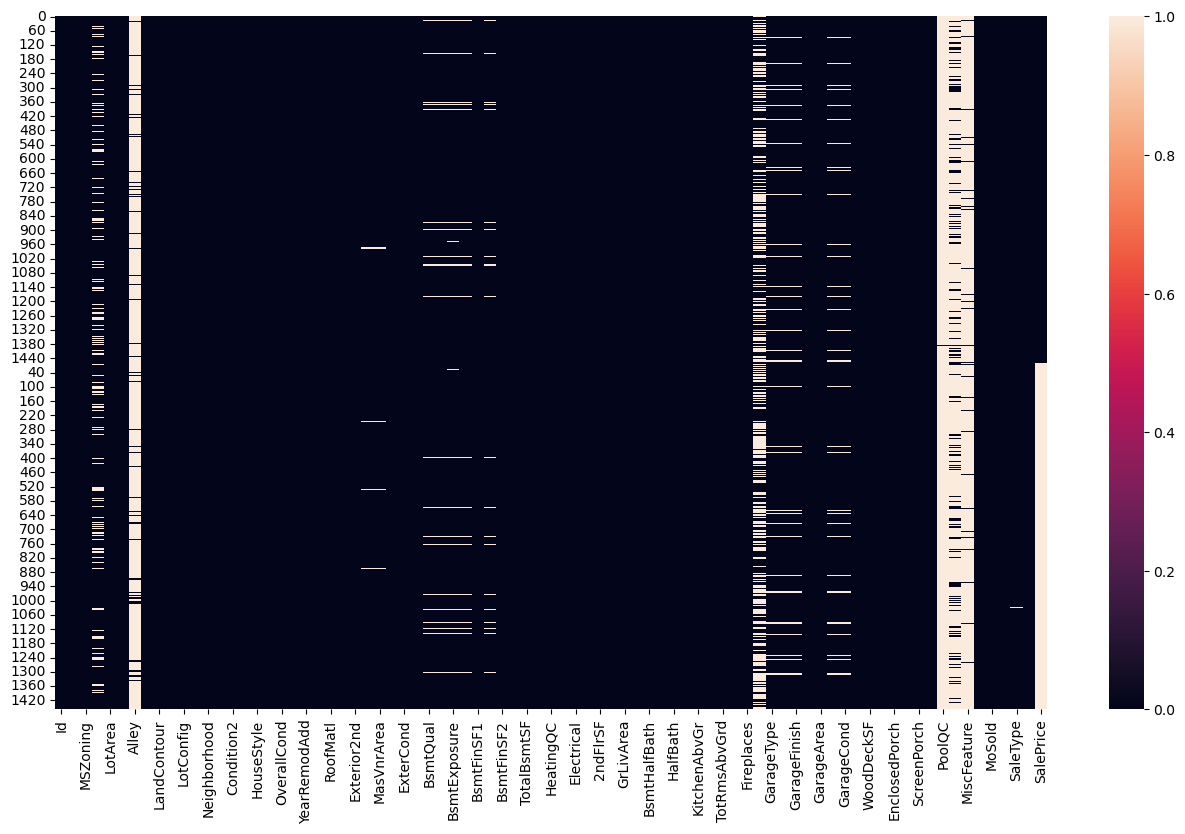

In [17]:
plt.figure(figsize = (16,9))
sns.heatmap(df.isnull())
plt.savefig('EDA_img/heatmap_df_pf_null_values.png')

## Get the null value percentage for every feature
<p>
To use the Keyboard Shortcuts, hit the esc key. After that, you can change a cell to Markdown by hitting the m key,
or you can change a cell to Code by hitting the y key.
</p>

In [ ]:
# Set index as ID column
df = df.set_index('Id')

In [ ]:
count_null_value = df.isnull().sum()
print(count_null_value)

In [ ]:
null_percentage = df.isnull().sum()/ df.shape[0] *100
print(null_percentage)

## Drop Columns/ Features
<p>As per observation, we will not drop any feature from dataset</p>

In [ ]:
 '''As per domain knowledge we will not drop those features instead None value we will add constand value NA'''
miss_value_50_per = null_percentage[null_percentage > 50]
miss_value_50_per

In [ ]:
df['Alley'].value_counts()

In [ ]:
'''As per domain knowledge we will not drop FireplaceQu features instead None value we will add constand value NA '''
miss_value_20_50_per = null_percentage[(null_percentage > 20) & (null_percentage < 50)] # Here don't use 'and' you can use this '&'
miss_value_20_50_per

In [ ]:
miss_value_5_20_per = null_percentage[(null_percentage > 5) & (null_percentage < 20)] # Here don't use 'and' you can use this '&'
miss_value_5_20_per

In [ ]:
df['LotFrontage'].value_counts().head()

In [ ]:
sns.heatmap(df[miss_value_5_20_per.keys()].isnull())

 ### Missing Value Imputaion

In [ ]:
missing_values_feet = null_percentage[null_percentage > 0]
print('Total Missing Value Features:',len(missing_values_feet))

In [ ]:
missing_values_feet

In [ ]:
categorical_null_freatures = missing_values_feet[missing_values_feet.keys().isin(object_features)]
print('Total number of object null features',len(categorical_null_freatures))
categorical_null_freatures

In [ ]:
float_null_freatures = missing_values_feet[missing_values_feet.keys().isin(floating_features)]
print('Total number of float null features',len(float_null_freatures))
float_null_freatures

In [ ]:
integer_null_freatures = missing_values_feet[missing_values_feet.keys().isin(int_features)]
print('Total number of integer null features',integer_null_freatures)
integer_null_freatures

### Handling MSZoning = 0.137033

In [ ]:
df['MSZoning'].value_counts()

In [ ]:
sns.countplot(df['MSZoning'])

In [ ]:
# Backup of original data
df_copy = df.copy()
df_copy.shape

In [ ]:
mznoing_mode = df_copy['MSZoning'].mode()[0]
mznoing_mode

In [ ]:
df_copy['MSZoning'].replace(np.nan,mznoing_mode, inplace = True)
df_copy['MSZoning'].isnull().sum()

In [ ]:
sns.countplot(df_copy['MSZoning'])

In [ ]:
def oldNewCountPlot(df_copy,df_new,feature):
    plt.subplot(121)
    sns.countplot(df['MSZoning'])
    plt.title('Old Data Distribution')
    plt.subplot(122)
    sns.countplot(df_copy['MSZoning'])
    plt.title('New Data Distribution')

In [ ]:
oldNewCountPlot(df_copy,df_copy,'MSZoning')

###  Handaling Alley = 93.216855

In [ ]:
df_copy['Alley'].value_counts()

In [ ]:
alleu_cont = 'NA'
df_copy['Alley'].replace(np.nan,alleu_cont, inplace = True)

In [ ]:
df_copy['Alley'].isnull().sum()

In [ ]:
def oldNewCountPlot(df_copy,df_new,feature):
    plt.subplot(121)
    sns.countplot(df['Alley'])
    plt.title('Old Data Distribution')
    plt.subplot(122)
    sns.countplot(df_copy['Alley'])
    plt.title('New Data Distribution')

In [ ]:
oldNewCountPlot(df_copy,df_copy,'Alley')

### Handling LotFrontage = 16.649538

In [ ]:
def BoxHistPplot(df_copy,figsize = (16,5)):
    plt.figure(figsize = figsize)
    plt.subplot(121)
    sns.boxplot(df_copy)
    plt.subplot(122)
    sns.distplot(df_copy)

In [ ]:
BoxHistPplot(df_copy['LotFrontage'])

In [ ]:
lotfrontage_mean = df_copy['LotFrontage'].mean()
lotfrontage_mean

In [ ]:
df_copy['LotFrontage'].replace(np.nan,lotfrontage_mean, inplace = True)
df_copy['LotFrontage'].isnull().sum()

In [ ]:
def oldNewhistPlot(df_copy,df_new,feature,figsize = (16,10)):
    plt.figure(figsize =figsize )
    plt.subplot(221)
    sns.boxplot(df[feature])
    plt.title('Old Data Distribution')
    plt.subplot(222)
    sns.distplot(df[feature])
    plt.title('New Data Distribution')
    
    plt.subplot(223)
    sns.boxplot(df_new[feature])
    plt.title('Old Data Distribution')
    plt.subplot(224)
    sns.distplot(df_new[feature])
    plt.title('New Data Distribution')

In [ ]:
oldNewhistPlot(df_copy,df_copy,'LotFrontage')

### Handling Utilities = 0.068517

In [ ]:
df_copy['Utilities'].value_counts()

In [ ]:
utilities_mode = df_copy['Utilities'].mode()[0]
utilities_mode

In [ ]:
df_copy['Utilities'].replace(np.nan,utilities_mode, inplace = True)
df_copy['Utilities'].isnull().sum()

In [ ]:
def oldNewCountPlot(df_copy,df_new,feature):
    plt.subplot(121)
    sns.countplot(df['Utilities'])
    plt.title('Old Data Distribution')
    plt.subplot(122)
    sns.countplot(df_copy['Utilities'])
    plt.title('New Data Distribution')

In [ ]:
oldNewCountPlot(df_copy,df_copy,'Utilities')

### Handling Exterior1st = 0.034258 and Exterior2nd = 0.034258

In [ ]:
df_copy['Exterior1st'].value_counts()

In [ ]:
df_copy['Exterior2nd'].value_counts()

In [ ]:
Exterior1st_mode = df_copy['Exterior1st'].mode()[0]
Exterior2nd_mode = df_copy['Exterior2nd'].mode()[0]
df_copy['Exterior1st'].replace(np.nan,Exterior1st_mode, inplace = True)
df_copy['Exterior2nd'].replace(np.nan,Exterior2nd_mode, inplace = True)
print('Exterior 1st:',df_copy['Exterior1st'].isnull().sum())
print('Exterior 2nd:',df_copy['Exterior2nd'].isnull().sum())

### Handling MasVnrType = 0.822199 and MasVnrArea = 0.787941

In [ ]:
sns.heatmap(df_copy[['MasVnrType','MasVnrArea']].isnull())

In [ ]:
df_copy[df_copy[['MasVnrType','MasVnrArea']].isnull().any(axis = 1)]

In [ ]:
MasVnrType_mode = df_copy['MasVnrType'].mode()[0]
MasVnrArea_cont = 0
df_copy['MasVnrType'].replace(np.nan,MasVnrType_mode, inplace = True)
df_copy['MasVnrArea'].replace(np.nan,MasVnrArea_cont, inplace = True)
print('MasVnrType:',df_copy['MasVnrType'].isnull().sum())
print('MasVnrArea:',df_copy['MasVnrArea'].isnull().sum())

### Handling BsmtQual NaN values

In [ ]:
Object_bsm_fact =['BsmtQual',
'BsmtCond',
'BsmtExposure',
'BsmtFinType1',
'BsmtFinType2']  

floating_bsm_fact= ['BsmtFinSF1',    
'BsmtFinSF2',
'BsmtUnfSF',
'TotalBsmtSF',
'BsmtFullBath',
'BsmtHalfBath']

In [ ]:
sns.heatmap(df_copy[Object_bsm_fact].isnull())

In [ ]:
for fact in Object_bsm_fact:
    print(f'Value count of {fact}: {df_copy[fact].value_counts()}')

In [ ]:
Object_bsm_cont = "NaN"
for fact in Object_bsm_fact:
    df_copy[fact].replace(np.nan,Object_bsm_cont, inplace = True)

In [ ]:
df_copy[Object_bsm_fact].isnull().sum()

In [ ]:
sns.heatmap(df_copy[floating_bsm_fact].isnull())

In [ ]:
df_bsm = df_copy[Object_bsm_fact + floating_bsm_fact]
df_bsm[df_bsm.isnull().any(axis=1)]

In [ ]:
bsm_object = 0
for fact in floating_bsm_fact:
    df_copy[fact].replace(np.nan,bsm_object, inplace = True)

In [ ]:
 df_copy[floating_bsm_fact].isnull().sum()

### Handling Electrical = 0.034258 and KitchenQual=0.034258

In [ ]:
df_copy['KitchenQual'].value_counts()

In [ ]:
df_copy['Electrical'].value_counts()

In [ ]:
df_kitcg = df_copy[['Electrical','KitchenQual','KitchenAbvGr']]
df_kitcg[df_kitcg.isnull().any(axis = 1)]

In [ ]:
electrical_mode = df_copy['Electrical'].mode()[0]
kitchenQual_mode = df_copy['KitchenQual'].mode()[0]
df_copy['Electrical'].replace(np.nan,electrical_mode, inplace = True)
df_copy['KitchenQual'].replace(np.nan,kitchenQual_mode, inplace = True)
print('Electrical:',df_copy['Electrical'].isnull().sum())
print('KitchenQual:',df_copy['KitchenQual'].isnull().sum())

### Handling Remaining Object Features

In [ ]:
df_copy['Functional'].value_counts()

In [ ]:
df_copy['SaleType'].value_counts()

In [ ]:
Functional_mode = df_copy['Functional'].mode()[0]
SaleType_mode = df_copy['SaleType'].mode()[0]
df_copy['Functional'].replace(np.nan,Functional_mode, inplace = True)
df_copy['SaleType'].replace(np.nan,SaleType_mode, inplace = True)
print('Functional:',df_copy['Functional'].isnull().sum())
print('SaleType:',df_copy['SaleType'].isnull().sum())

In [ ]:
other_objet_fact = ['FireplaceQu',
'PoolQC',
'Fence',
'MiscFeature']

for fact in other_objet_fact:
    print(f'The value count of {fact}: {df_copy[fact].value_counts()}')

In [ ]:
other_object_na = 'Na'
for fact in other_objet_fact:
    df_copy[fact].replace(np.nan,other_object_na, inplace = True)

In [ ]:
df_copy[other_objet_fact].isnull().sum()

### Handling Garage Features

In [ ]:
object_value_fact = ['GarageType',
'GarageFinish',
'GarageQual', 
'GarageCond']

for fact in object_value_fact:
    print(f'Total value count of {fact}: {df_copy[fact].value_counts()}')

In [ ]:
garage_value_None = 'NA'
for fact in object_value_fact:
    df_copy[fact].replace(np.nan,garage_value_None, inplace = True)

In [ ]:
df_copy[object_value_fact].isnull().sum()

In [ ]:
floting_value_fact = ['GarageYrBlt',
'GarageCars',
'GarageArea']

In [ ]:
floting_value_none = 0
for fact in floting_value_fact:
    df_copy[fact].replace(np.nan,floting_value_none, inplace = True)

In [ ]:
df_copy[floting_value_fact].isnull().sum()

In [ ]:
df_copy.isnull().any(axis = 1).sum()

In [ ]:
df_copy.isnull().sum()

### Feature transformation
### Convert numerical feature to categorical feature

In [ ]:
feature_for_num_conv =['MSSubClass','YearBuilt','GarageYrBlt','MoSold','YrSold',]
for fact in feature_for_num_conv:
    print(f'Data Types {fact}: {df_copy[fact].dtype}')
    

In [ ]:
df_copy[feature_for_num_conv].head()

In [ ]:
df_copy['MoSold'].unique()

In [ ]:
calendar.month_abbr[9]

In [ ]:
df_copy['MoSold'] = df_copy['MoSold'].apply(lambda x:calendar.month_abbr[x])
df_copy['MoSold'].unique() # Already Exists

In [ ]:
for fea in feature_for_num_conv:
    df_copy[fea] = df_copy[fea].astype(str)

In [ ]:
feature_for_num_conv =['MSSubClass','YearBuilt','GarageYrBlt','MoSold','YrSold',]
for fact in feature_for_num_conv:
    print(f'Data Types {fact}: {df_copy[fact].dtype}')

### Convert categorical feature into numerical feature
#### Ordinal Encoding

In [ ]:
ordinal_end_var = ['ExterQual',
'ExterCond',
'BsmtQual',
'BsmtCond',
'BsmtExposure',
'BsmtFinType1',
'BsmtFinSF1',
'BsmtFinType2',
'HeatingQC',
'KitchenQual',
'FireplaceQu',
'GarageQual',
'GarageCond',
'PoolQC',
'Utilities',
'Functional',
'GarageFinish',
'PavedDrive']
print('Total number of features to convert ordinal numerical format:', len(ordinal_end_var))

In [ ]:
df_copy['ExterQual'].value_counts()

In [ ]:
df_copy['ExterQual'] = df_copy['ExterQual'].astype(CategoricalDtype(categories =['Po','Fa','TA','Gd','Ex'], ordered = True)).cat.codes # Remainder(Poor to Excellent)

In [ ]:
df_copy['ExterQual'].value_counts()

In [ ]:
df_copy['ExterCond'].value_counts()

In [ ]:
df_copy['ExterCond'] = df_copy['ExterCond'].astype(CategoricalDtype(categories =['Po','Fa','TA','Gd','Ex'], ordered = True)).cat.codes # Remainder(Poor to Excellent)

In [ ]:
df_copy['ExterCond'].value_counts()

In [ ]:
df_copy['BsmtQual'].value_counts()

In [ ]:
df_copy['BsmtQual'] = df_copy['BsmtQual'].astype(CategoricalDtype(categories =['NaN','Fa','TA','Gd','Ex'], ordered = True)).cat.codes # Remainder(Poor to Excellent)

In [ ]:
df_copy['BsmtQual'].value_counts()

In [ ]:
df_copy['BsmtCond'].value_counts()

In [ ]:
df_copy['BsmtCond'] = df_copy['BsmtCond'].astype(CategoricalDtype(categories =['Po','NaN','Fa','Gd','TA'], ordered = True)).cat.codes # Remainder(Poor to Excellent)

In [ ]:
df_copy['BsmtCond'].value_counts()

In [ ]:
df_copy['BsmtExposure'].value_counts()

In [ ]:
df_copy['BsmtExposure'] = df_copy['BsmtExposure'].astype(CategoricalDtype(categories =['NaN','No','Mn','Av','Gd'], ordered = True)).cat.codes # Remainder(Poor to Excellent)

In [ ]:
df_copy['BsmtExposure'].value_counts()

In [ ]:
df_copy['BsmtFinType1'].value_counts()

In [ ]:
df_copy['BsmtFinType1'] = df_copy['BsmtFinType1'].astype(CategoricalDtype(categories =['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ'], ordered = True)).cat.codes # Remainder(Poor to Excellent)

In [ ]:
df_copy['BsmtFinType1'].value_counts()

In [ ]:
df_copy['BsmtFinType2'].value_counts()

In [ ]:
df_copy['BsmtFinType2'] = df_copy['BsmtFinType2'].astype(CategoricalDtype(categories =['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ'], ordered = True)).cat.codes # Remainder(Poor to Excellent)

In [ ]:
df_copy['BsmtFinType2'].value_counts()

In [ ]:
df_copy['HeatingQC'].value_counts()

In [ ]:
df_copy['HeatingQC'] = df_copy['HeatingQC'].astype(CategoricalDtype(categories =['Po','Fa','TA','Gd','Ex'], ordered = True)).cat.codes # Remainder(Poor to Excellent)

In [ ]:
df_copy['HeatingQC'].value_counts()

In [ ]:
df_copy['KitchenQual'].value_counts()

In [ ]:
df_copy['KitchenQual'] = df_copy['KitchenQual'].astype(CategoricalDtype(categories =['Fa','TA','Gd','Ex'], ordered = True)).cat.codes # Remainder(Poor to Excellent)

In [ ]:
df_copy['KitchenQual'].value_counts()

In [ ]:
df_copy['FireplaceQu'].value_counts()

In [ ]:
df_copy['FireplaceQu'] = df_copy['FireplaceQu'].astype(CategoricalDtype(categories =['Na','Po','Fa','TA','Gd','Ex'], ordered = True)).cat.codes # Remainder(Poor to Excellent)

In [ ]:
df_copy['FireplaceQu'].value_counts()

In [ ]:
df_copy['GarageQual'].value_counts()

In [ ]:
df_copy['GarageQual'] = df_copy['GarageQual'].astype(CategoricalDtype(categories =['NA','Po','Fa','TA','Gd','Ex'], ordered = True)).cat.codes # Remainder(Poor to Excellent)

In [ ]:
df_copy['GarageQual'].value_counts()

In [ ]:
df_copy['GarageCond'].value_counts()

In [ ]:
df_copy['GarageCond'] = df_copy['GarageCond'].astype(CategoricalDtype(categories =['NA','Po','Fa','TA','Gd','Ex'], ordered = True)).cat.codes # Remainder(Poor to Excellent)

In [ ]:
df_copy['GarageCond'].value_counts()

In [ ]:
df_copy['PoolQC'].value_counts()

In [ ]:
df_copy['PoolQC'] = df_copy['PoolQC'].astype(CategoricalDtype(categories =['NA','Fa','TA','Gd','Ex'], ordered = True)).cat.codes # Remainder(Poor to Excellent)

In [ ]:
df_copy['PoolQC'].value_counts()

In [ ]:
df_copy['Functional'].value_counts()

In [ ]:
df_copy['Functional'] = df_copy['Functional'].astype(CategoricalDtype(categories =['Sal','Sev','Maj2','Maj1','Mod','Min2','Min1','Typ'], ordered = True)).cat.codes # Remainder(Poor to Excellent)

In [ ]:
df_copy['Functional'].value_counts()

In [ ]:
df_copy['GarageFinish'].value_counts()

In [ ]:
df_copy['GarageFinish'] = df_copy['GarageFinish'].astype(CategoricalDtype(categories =['NA','Unf','RFn','Fin'], ordered = True)).cat.codes # Remainder(Poor to Excellent)

In [ ]:
df_copy['GarageFinish'].value_counts()

In [ ]:
df_copy['PavedDrive'].value_counts()

In [ ]:
df_copy['PavedDrive'] = df_copy['PavedDrive'].astype(CategoricalDtype(categories =['P','N','Y'], ordered = True)).cat.codes # Remainder(Poor to Excellent)

In [ ]:
df_copy['PavedDrive'].value_counts()

In [ ]:
df_copy['Utilities'].value_counts()

In [ ]:
df_copy['Utilities'] = df_copy['Utilities'].astype(CategoricalDtype(categories =['ELO','NoSeWa','NoSeWr','AllPub'], ordered = True)).cat.codes # Remainder(Poor to Excellent)

In [ ]:
df_copy['Utilities'].value_counts()

In [ ]:
df_copy[ordinal_end_var].info()

In [ ]:
df_copy.info()

### One Hot Encoding for Nominal Categorical Data

In [ ]:
df_encod = df_copy.copy()

object_feature_fact = df_encod.select_dtypes(include = 'object').columns.tolist()
print('Total number of data type features:', len(object_feature_fact))
print('Features: \n',object_feature_fact)

In [ ]:
df_encod[object_feature_fact].head(2)

In [ ]:
print('Shape of dataframe before encoding : ',df_encod.shape)
df_encod = pd.get_dummies(df_encod, 
              columns = object_feature_fact,
              prefix = object_feature_fact, 
              drop_first = True)
print('Shape of dataframe after encoding : ',df_encod.shape)

In [ ]:
df_encod.head(2)

In [ ]:
df_encod.select_dtypes(include = 'object').columns.tolist()

In [ ]:
df_encod.shape

In [ ]:
len_train = train_data.shape[0]
len_train

In [ ]:
X_train = df_encod[:len_train].drop('SalePrice', axis = 1)
y_train = df_encod['SalePrice'][:len_train]
X_test = df_encod[len_train:].drop('SalePrice', axis = 1)
print('Shape of X_train:',X_train.shape)
print('Shape of X_test:',X_test.shape)
print('Shape of y_train:',y_train.shape)

### Feature Scaling

In [ ]:
sc = StandardScaler()
sc.fit(X_train) # formula z = (x-u)/s
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train[:3,:] # :3=start 0 to 3  and ':' all columns 

In [ ]:
X_train[:3,:]

In [ ]:
X_test[:3,:]

In [ ]:
# Carry forward for deployment
#sc.feature_names_in_
#sc.mean_
#sc.n_features_in_
#sc.n_features_in_
#sc.var_
#sc.with_mean
#sc.with_std

### Model Selections

In [ ]:
!pip install xgboost

In [ ]:
from sklearn.linear_model import LinearRegression 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor

In [ ]:
li_r = LinearRegression()
kne_r = KNeighborsRegressor()
deci_t_r =  DecisionTreeRegressor()
sgd_r = SGDRegressor()
hist_gard_boo_c = HistGradientBoostingClassifier()
r_f_r = RandomForestRegressor()

In [ ]:
m_l_models = {
    'a' :['LinearRegression:',li_r],
    'b' :['KNeighborsRegressor:',kne_r],
    'c' :['DecisionTreeRegressor:',deci_t_r],
    'd' :['SGDRegressor:',sgd_r],
    'e' :['RandomForestRegressor:',r_f_r],
    'f' :['HistGradientBoostingClassifier:',hist_gard_boo_c]
  }

### Cross Validation

In [ ]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import r2_score, make_scorer

def test_model(m_l_models, X_train = X_train, y_train = y_train ):
    cv = KFold(n_splits = 7, shuffle = True, random_state = 45)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(m_l_models, X_train, y_train, cv = cv, scoring= r2)
    score = [r2_val_score.mean()]
    return score

In [ ]:
model_evaluation = []
for model in m_l_models:
    print('Training model :', m_l_models[model][0])
    score = test_model(m_l_models[model][1], X_train, y_train)
    print('Score of model:', score)
    model_evaluation.append([m_l_models[model][0],score[0]])